In [2]:
import pandas as pd

dataframe = pd.read_csv("dataset/CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [3]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [4]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [5]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [7]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36457606314711744


In [8]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0749530537541765


In [9]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.58002074861


In [10]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [11]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32723725045744956 1.3087180692590692 3526.4587169299925


In [12]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3646282145632622 1.0748802673338418 3431.574619583539


In [13]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.35031238378388785 1.1190830396379172 3019.031428919884


In [14]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski= clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03965488524648129 3.512260518046502 303.9140857567123
0.3646282145632622 1.0748802673338418 3431.574619583539


In [15]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1= clustering_algorithm(5, set1)
s2, dbs2, calinski2= clustering_algorithm(5, set2)
s3, dbs3, calinski3= clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.368870543902123 1.0584885126600132 1204.0478229017128
0.35406999696241026 1.1389554530299943 1194.945411949724
0.36176754606308126 1.1526917981657312 1159.0102311731243


In [16]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

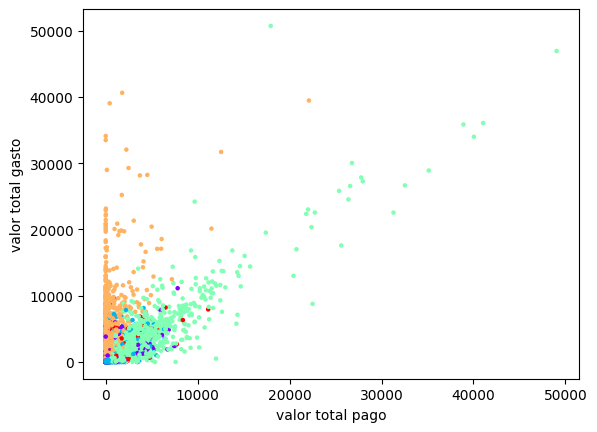

In [17]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show()

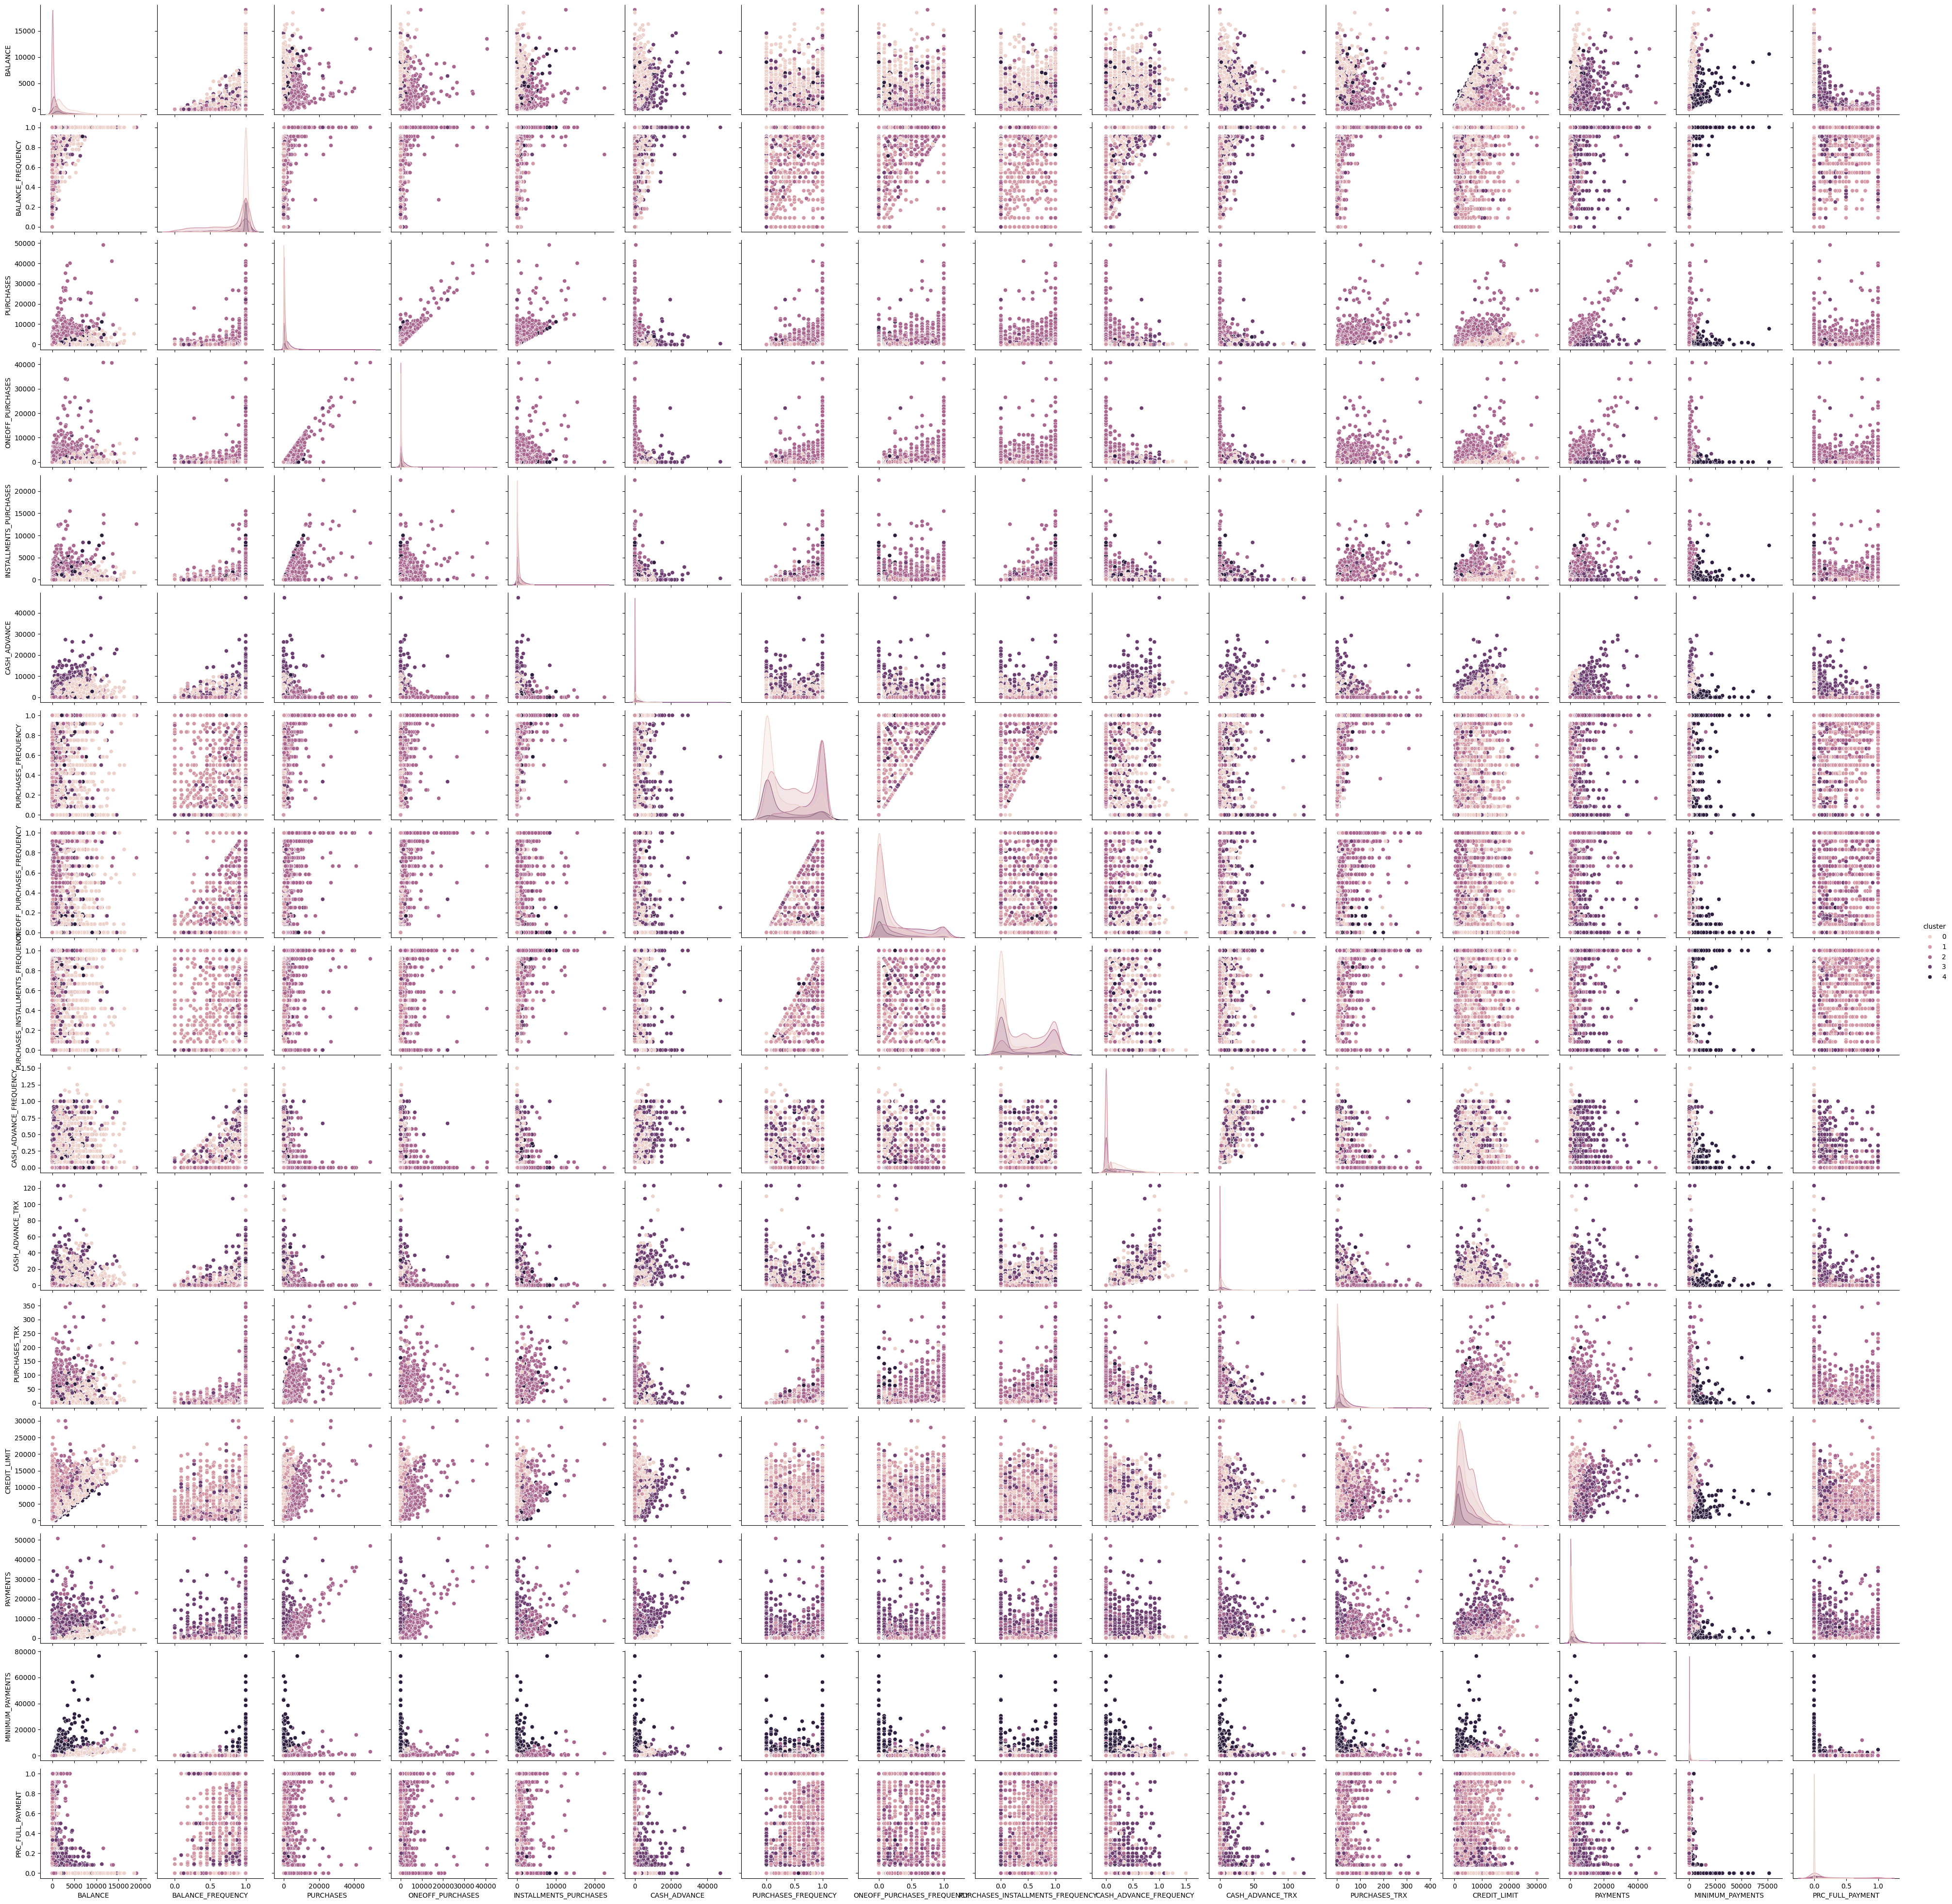

In [18]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

In [19]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2642.0  3044.938037  2482.240438   6.824905  1263.747824   
1        3284.0   445.102105   847.653849   0.000000    23.396562   
2        1544.0  1143.323704  1662.446912   0.000000   212.974614   
3        1081.0  1800.909055  1979.686042   0.000000   509.872908   
4         399.0  1963.743393  1836.283217  70.794108  1007.928213   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2173.994774  4241.510992  18495.558550            2642.0  0.964891   
1          83.076265   412.596088   9630.367575            3284.0  0.774331   
2         556.818403  1372.545949  19043.138560            1544.0  0.927532   
3        1100.941072  2321.846501  14581.459140            1081.0  0.862756   
4        1316.179352  2127.610649  11670.179850             399.0  0.989170   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1331.858565   8345.641905           2642.0  0.001772   
1        ...       249.152357   4483.503862           3284.0  0.246505   
2        ...       525.802344  18621.013310           1544.0  0.277309   
3        ...       886.322345  21235.065300           1081.0  0.115960   
4        ...      7305.064790  76406.207520            399.0  0.020108   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023236  0.0  0.0  0.000000  0.000000  0.6  
1        0.346644  0.0  0.0  0.000000  0.444444  1.0  
2        0.366536  0.0  0.0  0.083333  0.545455  1.0  
3        0.186377  0.0  0.0  0.083333  0.142857  1.0  
4        0.092247  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [20]:
centroide = kmeans.cluster_centers_
print(centroide)

[[5.06008804e-01 2.73199069e-04 6.26436989e-02 3.68644377e-02
  2.58010236e-02 2.49962891e-01 6.84607127e-05 2.62761411e-05
  4.56720931e-05 5.70264270e-05 1.14528182e-03 1.35307476e-03
  7.18700948e-01 1.66343271e-01 1.80691979e-01 5.33603955e-07]
 [6.92595308e-02 2.30686023e-04 1.21382295e-01 4.79315402e-02
  7.35508613e-02 2.47153466e-02 1.72659283e-04 3.36343950e-05
  1.40157387e-04 7.96901589e-06 1.25450247e-04 2.86056694e-03
  9.43498125e-01 1.53749473e-01 5.68773030e-02 7.60565847e-05]
 [1.60282475e-01 2.44976409e-04 4.37904148e-01 2.56849464e-01
  1.81225639e-01 2.59402903e-02 2.04235686e-04 8.89741230e-05
  1.50490244e-04 9.43845624e-06 1.73362399e-04 6.16864361e-03
  6.02872332e-01 4.03908363e-01 8.57564447e-02 7.17211541e-05]
 [2.36713453e-01 2.16961764e-04 5.90293196e-02 3.35589818e-02
  2.54755090e-02 4.04460081e-01 5.16953900e-05 2.01969756e-05
  3.43732340e-05 6.61260673e-05 1.58762268e-03 1.09779947e-03
  5.37642538e-01 5.92146837e-01 1.04865812e-01 2.74145272e-05]
 [3.

In [21]:
max= len(centroide[0])
for i in range(max):
    print(dataframe.columns.values[i], "{:.4f}".format(centroide[:, i].var()))

BALANCE 0.0223
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0196
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0228
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0366
PAYMENTS 0.0273
MINIMUM_PAYMENTS 0.0558
PRC_FULL_PAYMENT 0.0000


BALANCE 0.0224
PURCHASES 0.0196
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
<!-- atributos com variancia -->

In [27]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients']= n_clients
print(description.round(2))

         BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  n_clients
cluster                                                                     
0        3044.94     389.00       1621.85       4489.61    968.13       2642
1         445.10     628.64        143.82       5131.61    813.97       3284
2        1143.32    3266.49        183.84       4092.07   3044.60       1544
3        1800.91     466.02       3287.02       3987.07   4667.48       1081
4        1963.74     850.30        417.37       2210.28   1339.21        399


CLUSTER 0: clientes que mais gastam, a maioria no saque, boa quantidade de clientes, não são bons pagadores.
CLUSTER 1: clientes que menos gastam, com maior limite, maior quantidade de clientes, bons pagadores.
CLUSTER 2: clientes que mais compram, pagam bem.
CLUSTER 3: clientes que mais gastam com saques, clientes com maior limite, pagam bem.
CLUSTER 4: menor limite. menor quantidade de clientes, não são bons pagadores.

In [24]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

count      mean       std  min  25%       50%       75%  max
cluster                                                               
0        2642.0  0.001772  0.023236  0.0  0.0  0.000000  0.000000  0.6
1        3284.0  0.246505  0.346644  0.0  0.0  0.000000  0.444444  1.0
2        1544.0  0.277309  0.366536  0.0  0.0  0.083333  0.545455  1.0
3        1081.0  0.115960  0.186377  0.0  0.0  0.083333  0.142857  1.0
4         399.0  0.020108  0.092247  0.0  0.0  0.000000  0.000000  1.0